# CI for Rating to Revenue
### This notebook will use IMDB and The Numbers data sets to determine how important rating is to a lucrative movie


In [13]:
### Import libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
## Connect to Database
conn = sqlite3.connect('data/im.db')

In [15]:
### Pull in IMDB rating table
q = """
SELECT 
    primary_title AS Primary_Title,
    original_title AS Original_Title,
    averagerating AS AVG_Rating,
    numvotes AS Num_Votes
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
;
"""
### Create Dataframe
df_rating = pd.read_sql(q, conn)
df_rating.head()

,Primary_Title,Original_Title,AVG_Rating,Num_Votes
0,Laiye Je Yaarian,Laiye Je Yaarian,8.3,31
1,Borderless,Borderless,8.9,559
2,Just Inès,Just Inès,6.4,20
3,The Legend of Hercules,The Legend of Hercules,4.2,50352
4,Até Onde?,Até Onde?,6.5,21


In [16]:
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
### Merge on Primary Title
df_combine_pt = pd.merge(df_rating, 
                         df_budgets, 
                         how='inner', 
                         left_on = 'Primary_Title', 
                         right_on='movie')
df_combine_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Primary_Title      2875 non-null   object 
 1   Original_Title     2875 non-null   object 
 2   AVG_Rating         2875 non-null   float64
 3   Num_Votes          2875 non-null   int64  
 4   id                 2875 non-null   int64  
 5   release_date       2875 non-null   object 
 6   movie              2875 non-null   object 
 7   production_budget  2875 non-null   object 
 8   domestic_gross     2875 non-null   object 
 9   worldwide_gross    2875 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 247.1+ KB


In [18]:
## Merge on Original Title
df_combine_ot = pd.merge(df_rating, 
                         df_budgets, 
                         how='inner', 
                         left_on = 'Original_Title', 
                         right_on='movie')
df_combine_ot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 0 to 2637
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Primary_Title      2638 non-null   object 
 1   Original_Title     2638 non-null   object 
 2   AVG_Rating         2638 non-null   float64
 3   Num_Votes          2638 non-null   int64  
 4   id                 2638 non-null   int64  
 5   release_date       2638 non-null   object 
 6   movie              2638 non-null   object 
 7   production_budget  2638 non-null   object 
 8   domestic_gross     2638 non-null   object 
 9   worldwide_gross    2638 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 226.7+ KB


In [19]:
### Checking to see the amount of unique values in both tables
print(len(df_combine_ot.movie.unique()),
      len(df_combine_pt.movie.unique()))
# Looks like we should keep it on pt and remove the duplicate movies

2066 2126


In [20]:
### Dropping the duplicate movie values
df_final = df_combine_pt.drop_duplicates(subset=['movie'],
                                         inplace=False)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2874
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Primary_Title      2126 non-null   object 
 1   Original_Title     2126 non-null   object 
 2   AVG_Rating         2126 non-null   float64
 3   Num_Votes          2126 non-null   int64  
 4   id                 2126 non-null   int64  
 5   release_date       2126 non-null   object 
 6   movie              2126 non-null   object 
 7   production_budget  2126 non-null   object 
 8   domestic_gross     2126 non-null   object 
 9   worldwide_gross    2126 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 182.7+ KB


In [22]:
import seaborn as sns

In [21]:
df_final.head()

,Primary_Title,Original_Title,AVG_Rating,Num_Votes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,The Legend of Hercules,The Legend of Hercules,4.2,50352,42,"Jan 10, 2014",The Legend of Hercules,"$70,000,000","$18,848,538","$58,953,319"
1,The Hammer,Hamill,7.0,1613,50,"Mar 21, 2008",The Hammer,"$850,000","$442,638","$442,638"
3,Baggage Claim,Baggage Claim,5.1,8296,38,"Sep 27, 2013",Baggage Claim,"$8,500,000","$21,569,509","$22,885,836"
4,Moneyball,Moneyball,7.6,326657,15,"Sep 23, 2011",Moneyball,"$50,000,000","$75,605,492","$111,300,835"
5,Hereafter,Hereafter,6.5,87288,61,"Oct 15, 2010",Hereafter,"$50,000,000","$32,746,941","$108,660,270"


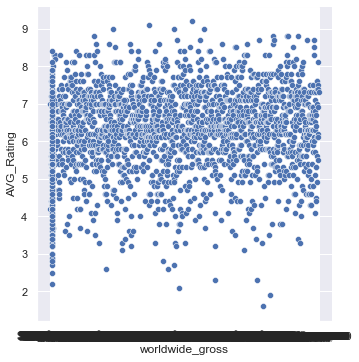

In [23]:
## First Draft
sns.set_theme()
sns.relplot(
            y=df_final.AVG_Rating, 
            x=df_final.worldwide_gross
            )

<ipython-input-24-1a703596450f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['worldwide_gross_numeric'] = pd.to_numeric(df_final['worldwide_gross'].str.replace(',', '').str.replace('$', ''))


<AxesSubplot:xlabel='worldwide_gross_numeric', ylabel='AVG_Rating'>

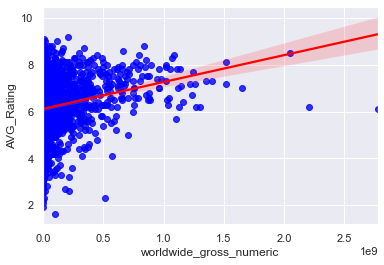

In [24]:
## Regression Data
df_final['worldwide_gross_numeric'] = pd.to_numeric(df_final['worldwide_gross'].str.replace(',', '').str.replace('$', ''))
sns.regplot(
    y=df_final['AVG_Rating'],
    x=df_final['worldwide_gross_numeric'],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"}
)

<ipython-input-25-868484fb89d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['worldwide_gross_numeric'] = pd.to_numeric(df_final['worldwide_gross'].str.replace(',', '').str.replace('$', ''))


<AxesSubplot:xlabel='AVG_Rating', ylabel='worldwide_gross_numeric'>

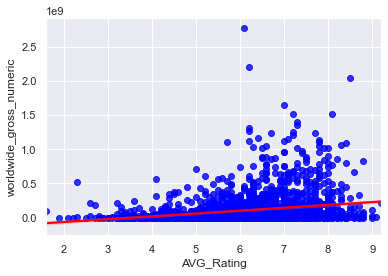

In [25]:
## Regression Data
df_final['worldwide_gross_numeric'] = pd.to_numeric(df_final['worldwide_gross'].str.replace(',', '').str.replace('$', ''))
sns.regplot(
    y=df_final['worldwide_gross_numeric'],
    x=df_final['AVG_Rating'],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)

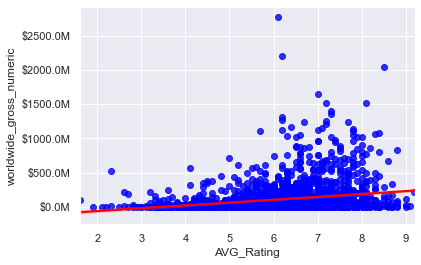

In [27]:
import matplotlib.ticker as ticker
# Define custom formatter function to display y-axis values in millions
def millions_formatter(x, pos):
    return '${:.1f}M'.format(x/1000000)

# Create regression plot with custom y-axis formatter
ax = sns.regplot(
    y=df_final['worldwide_gross_numeric'],
    x=df_final['AVG_Rating'],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)

# Apply custom formatter to y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Show plot
plt.show()
